PARA AL MAYORIA DE ESTOS DATOS A MI ME PARECE LA MEJOR ELECCION HACER GRAFICOS DE DISTRIBUCION RESPECTO A LA PERFORMANCE

CAMPANAS POR EL TCL

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [69]:
df = pd.read_csv("datos_try2.csv")
df.columns

Index(['strength', 'agility', 'expertise', 'endurance', 'health', 'height',
       'performance', 'final_character_type', 'generation', 'N', 'K', 'M',
       'threshold', 'character_type', 'selection_method_1',
       'selection_method_2', 'selection_method_3', 'selection_method_4',
       'crossing_method', 'mutation_method', 'new_generation_method', 'gene',
       'A', 'B', 'p_m', 'Tc', 'T0', 'k', 'max_generations',
       'max_generations_without_change', 'delta'],
      dtype='object')

In [70]:
df.dtypes

strength                          float64
agility                           float64
expertise                         float64
endurance                         float64
health                            float64
height                            float64
performance                       float64
final_character_type               object
generation                          int64
N                                   int64
K                                   int64
M                                   int64
threshold                         float64
character_type                     object
selection_method_1                 object
selection_method_2                 object
selection_method_3                 object
selection_method_4                 object
crossing_method                    object
mutation_method                    object
new_generation_method              object
gene                               object
A                                 float64
B                                 

In [71]:
objectColumns = df.select_dtypes(include=['object']).columns
df[objectColumns] = df[objectColumns].astype('string')
df.dtypes

strength                          float64
agility                           float64
expertise                         float64
endurance                         float64
health                            float64
height                            float64
performance                       float64
final_character_type               string
generation                          int64
N                                   int64
K                                   int64
M                                   int64
threshold                         float64
character_type                     string
selection_method_1                 string
selection_method_2                 string
selection_method_3                 string
selection_method_4                 string
crossing_method                    string
mutation_method                    string
new_generation_method              string
gene                               string
A                                 float64
B                                 

In [72]:
df.groupby(['final_character_type','character_type'])['performance'].describe().sort_values('mean', ascending=False)

count       mean  \
final_character_type                  character_type                      
<class 'character_class.Archer'>      archer          6718.0  34.435766   
                                      infiltrator     5571.0  33.791650   
                                      warrior         5542.0  32.714885   
<class 'character_class.Infiltrator'> infiltrator     1149.0  31.920320   
<class 'character_class.Defender'>    defender        5191.0  30.962870   
<class 'character_class.Archer'>      defender        1295.0  27.586150   
<class 'character_class.Defender'>    warrior            6.0  26.844706   
<class 'character_class.Warrior'>     warrior         1120.0  24.375126   
<class 'character_class.Defender'>    archer             1.0  23.908256   
<class 'character_class.Infiltrator'> archer             1.0  23.677502   
                                      warrior           52.0  23.534842   
                                      defender         234.0  21.814603   

                                                           std        min  \
final_character_type                  character_type                        
<class 'character_class.Archer'>      archer          8.584796  22.916658   
                                      infiltrator     8.489980  22.458379   
                                      warrior         8.411054  21.111119   
<class 'character_class.Infiltrator'> infiltrator     7.882534  21.711118   
<class 'character_class.Defender'>    defender        8.210739  18.412959   
<class 'character_class.Archer'>      defender        7.221364  20.941068   
<class 'character_class.Defender'>    warrior         3.473035  22.756918   
<class 'character_class.Warrior'>     warrior         4.908123  17.695291   
<class 'character_class.Defender'>    archer               NaN  23.908256   
<class 'character_class.Infiltrator'> archer               NaN  23.677502   
                                      warrior         1.496352  21.081106   
                                      defender        1.123582  18.510236   

                                                            25%        50%  \
final_character_type                  character_type                         
<class 'character_class.Archer'>      archer          28.931506  31.851234   
                                      infiltrator     28.421563  31.623657   
                                      warrior         27.187161  30.470194   
<class 'character_class.Infiltrator'> infiltrator     26.549067  29.224386   
<class 'character_class.Defender'>    defender        25.711958  28.232404   
<class 'character_class.Archer'>      defender        23.865329  25.604827   
<class 'character_class.Defender'>    warrior         25.501581  26.442712   
<class 'character_class.Warrior'>     warrior         21.080333  22.970787   
<class 'character_class.Defender'>    archer          23.908256  23.908256   
<class 'character_class.Infiltrator'> archer          23.677502  23.677502   
                                      warrior         22.373486  23.228284   
                                      defender        21.029098  21.806504   

                                                            75%        max  
final_character_type                  character_type                        
<class 'character_class.Archer'>      archer          35.965333  61.851041  
                                      infiltrator     35.345687  61.881124  
                                      warrior         34.506871  61.860824  
<class 'character_class.Infiltrator'> infiltrator     34.134482  53.752056  
<class 'character_class.Defender'>    defender        32.799673  58.118941  
<class 'character_class.Archer'>      defender        28.238972  60.204742  
<class 'character_class.Defender'>    warrior         26.872773  33.221896  
<class 'character_class.Warrior'>     warrior         25.714230  40.633499  
<class 'character_class.Defender'>    archer          23.90825

Es notable que los arqueros son la clase con mejor performance (mayor impacto del cambio de las estadisticas)

Parece buena idea utilizarlos como subgrupo para analizar el impacto de los metodos en mayor medida

In [73]:
filteredDf = df[df['final_character_type'] == "<class 'character_class.Archer'>"]


In [74]:
filteredDf.groupby(['selection_method_1'])['performance'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
selection_method_1,,,,,,,,
deterministic_tournament,2563.0,38.834404,11.809453,23.279998,30.054260,32.943883,50.119233,61.881124
boltzmann,2729.0,38.551761,12.047033,22.161961,29.778943,32.502767,52.760105,61.152902
ranking,2631.0,36.220887,3.901572,24.511249,33.507070,35.595360,38.394529,54.057248
elite,2572.0,35.233564,7.095523,22.787848,30.140631,32.466568,40.118856,59.027803
probabilistic_tournament,2873.0,32.020218,2.805417,22.236758,30.301554,31.938699,33.742835,43.743574
universal,2900.0,26.951380,2.150495,20.941068,25.522977,26.822638,28.297995,36.969399
roulette,2858.0,26.526035,2.126032,21.087134,25.037159,26.400924,27.841728,34.779861


Notar la muy baja desviacion de ranking, torneo probabilistico, ruleta y ruleta_universal

Boltzman y torneo deterministico tienen una distribucion muy parecida ( observar los fractiles )

Veamos si en el resto de los datos se mantiene esta preferencia

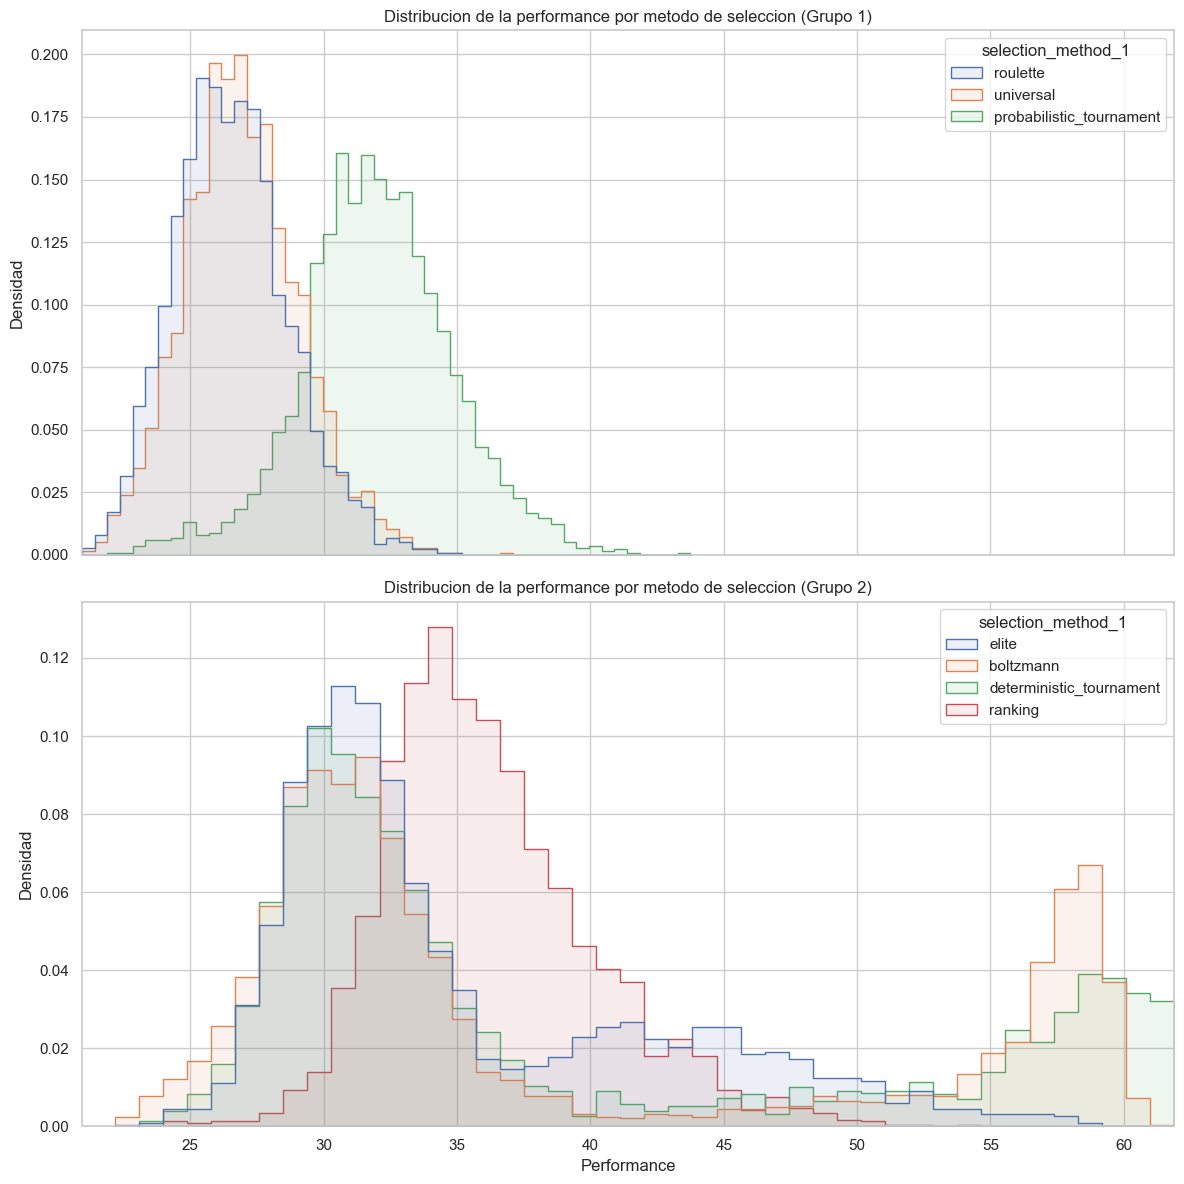

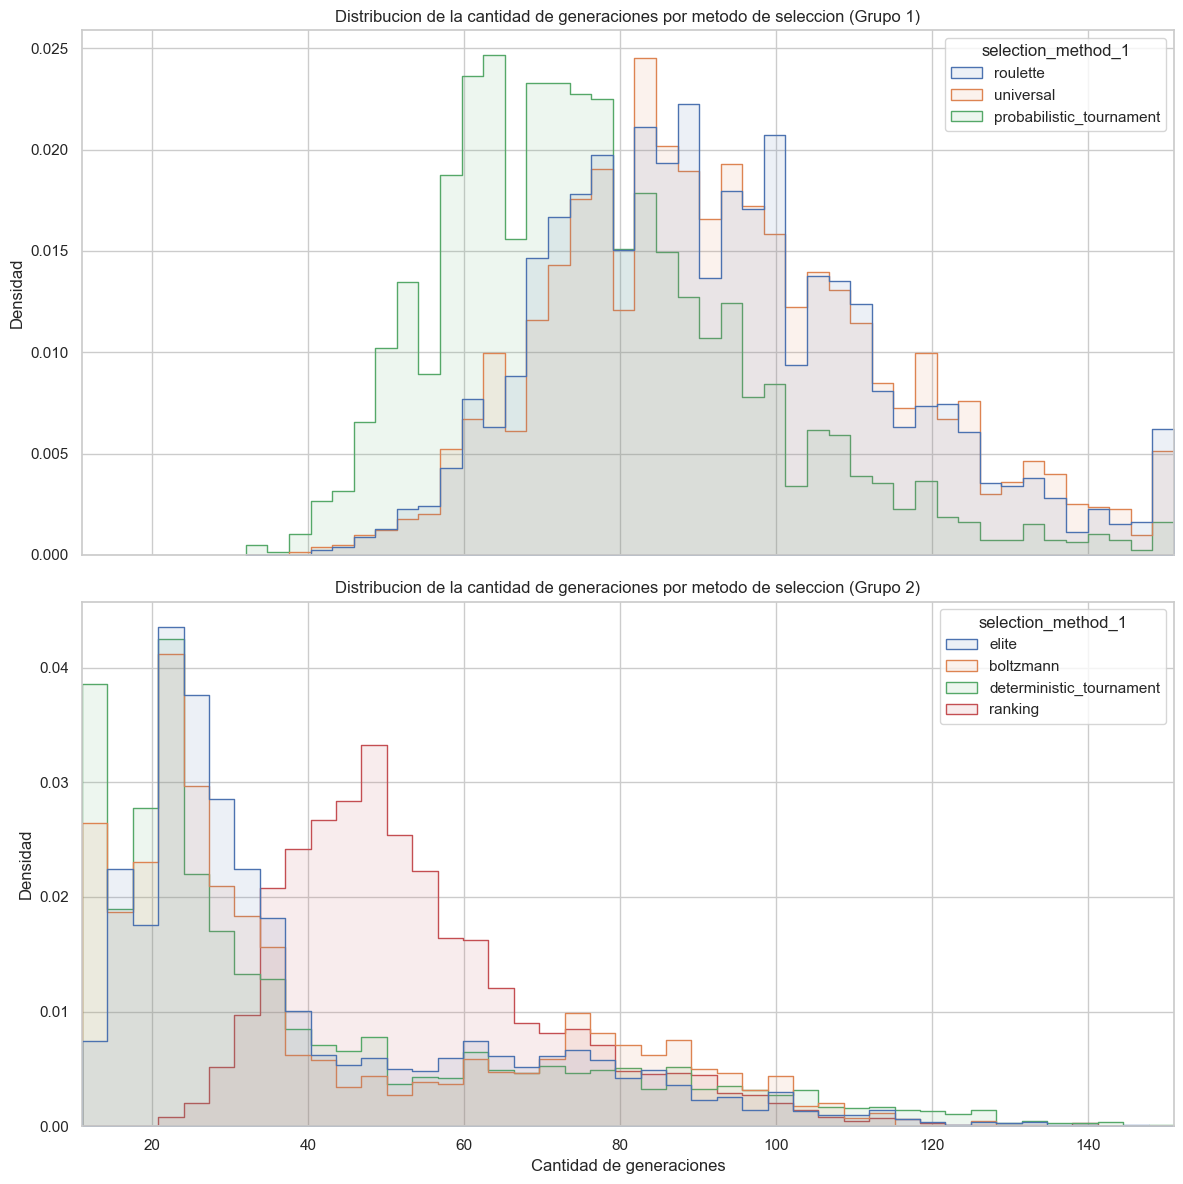

In [75]:
group1 = ['universal', 'roulette', 'probabilistic_tournament']
group2 = ['elite', 'boltzmann', 'deterministic_tournament', 'ranking']

data_df = filteredDf

performance_min = data_df['performance'].min()
performance_max = data_df['performance'].max()
generation_min = data_df['generation'].min()
generation_max = data_df['generation'].max()
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

sns.histplot(data=data_df[data_df['selection_method_1'].isin(group1)], x="performance", hue="selection_method_1", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes[0])
axes[0].set_title("Distribucion de la performance por metodo de seleccion (Grupo 1)")
axes[0].set_ylabel("Densidad")
axes[0].set_xlim([performance_min, performance_max])

sns.histplot(data=data_df[data_df['selection_method_1'].isin(group2)], x="performance", hue="selection_method_1", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes[1])
axes[1].set_title("Distribucion de la performance por metodo de seleccion (Grupo 2)")
axes[1].set_xlabel("Performance")
axes[1].set_ylabel("Densidad")
axes[1].set_xlim([performance_min, performance_max])

plt.tight_layout()
plt.show()

# Create even less opaque plots with 'generation' graphs from different groups, one above the other
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

sns.histplot(data=data_df[data_df['selection_method_1'].isin(group1)], x="generation", hue="selection_method_1", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes[0])
axes[0].set_title("Distribucion de la cantidad de generaciones por metodo de seleccion (Grupo 1)")
axes[0].set_ylabel("Densidad")
axes[0].set_xlim([generation_min, generation_max])

sns.histplot(data=data_df[data_df['selection_method_1'].isin(group2)], x="generation", hue="selection_method_1", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes[1])
axes[1].set_title("Distribucion de la cantidad de generaciones por metodo de seleccion (Grupo 2)")
axes[1].set_xlabel("Cantidad de generaciones")
axes[1].set_ylabel("Densidad")
axes[1].set_xlim([generation_min, generation_max])

plt.tight_layout()
plt.show()


In [76]:
df.groupby(['selection_method_1'])['performance'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
selection_method_1,,,,,,,,
deterministic_tournament,3840.0,37.485909,11.794068,20.252360,28.902202,32.195633,48.117114,61.881124
boltzmann,3840.0,37.132177,11.872115,20.611100,28.497307,31.757407,48.879211,61.152902
ranking,3840.0,34.765909,4.484434,21.557213,32.075164,34.506621,37.288804,54.057248
elite,3840.0,33.662599,7.275859,19.986937,28.640501,31.556695,37.947661,59.027803
probabilistic_tournament,3840.0,30.993703,3.360352,19.878675,29.085279,31.173932,33.143493,43.743574
universal,3840.0,26.229715,2.588393,18.127642,24.761367,26.288600,27.868302,36.969399
roulette,3840.0,25.736404,2.589785,17.695291,24.201633,25.767666,27.405066,34.779861


Se mantiene

In [77]:
filteredDf.groupby('crossing_method')['performance'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
crossing_method,,,,,,,,
anular,4811.0,33.414280,8.422971,21.455303,28.153135,31.094147,35.050817,61.881124
uniform,4737.0,33.372657,8.851190,21.087134,27.436599,31.323832,35.270181,61.878917
one_point,4788.0,33.230795,8.463148,21.484343,27.854971,30.996361,34.818518,61.853465
double_point,4790.0,33.125529,8.607077,20.941068,27.540635,30.869662,34.886625,61.849732


El metodo de cruce parece tener un efecto nulo.

Puede ser por el uso del mismo metodo de seleccion en las cuatro poblaciones de la muestra.

In [78]:
filteredDf.groupby('mutation_method')['performance'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
mutation_method,,,,,,,,
uniform_multigen,5482.0,39.681411,12.008075,21.087134,28.379902,37.806899,49.867719,61.881124
gene_mutation,2886.0,31.613651,7.234031,21.891525,27.599813,29.835714,32.851664,60.448016
limited_multigen,5274.0,31.190320,3.980567,21.158303,28.042354,31.560603,34.013631,51.410434
complete_mutation,5484.0,29.787467,3.383133,20.941068,27.316430,29.770310,32.083457,41.957728


Uniform es el mas performante por un notable margen (notar la mediana)

Veamos si en todas las clases este resultado se mantiene

In [79]:
df.groupby('mutation_method')['performance'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
mutation_method,,,,,,,,
uniform_multigen,6720.0,39.459380,11.816461,19.611398,28.472761,37.683189,49.412264,61.881124
limited_multigen,6720.0,30.526365,4.049941,19.846711,27.329171,30.735786,33.451442,51.410434
gene_mutation,6720.0,29.945292,7.608052,17.695291,25.333151,28.326705,31.938011,60.448016
complete_mutation,6720.0,29.215486,3.518577,19.265441,26.573307,29.187592,31.618716,41.957728


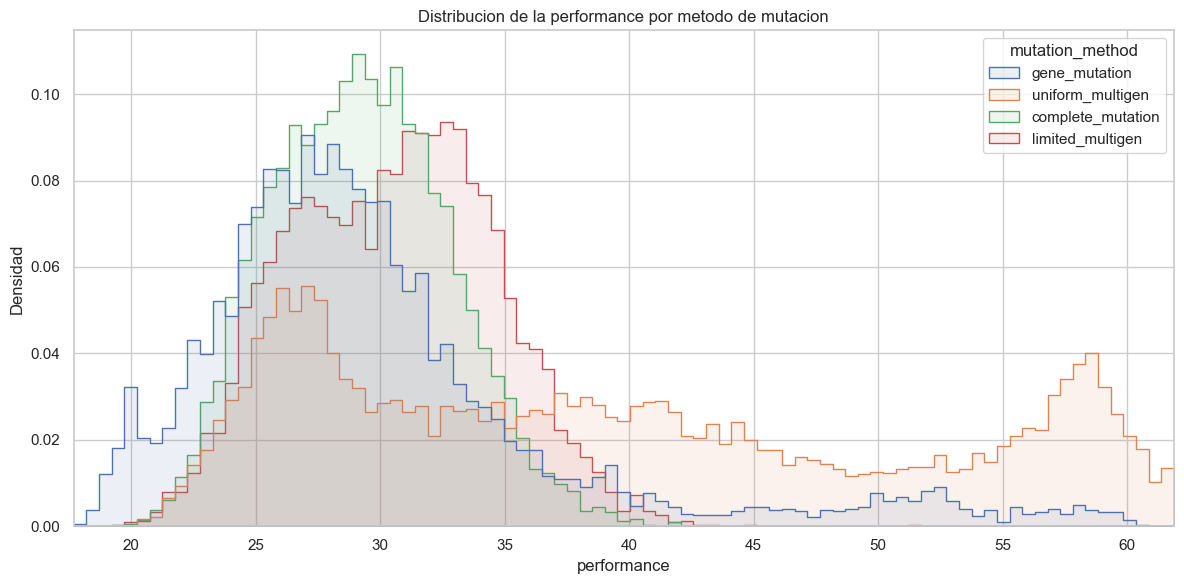

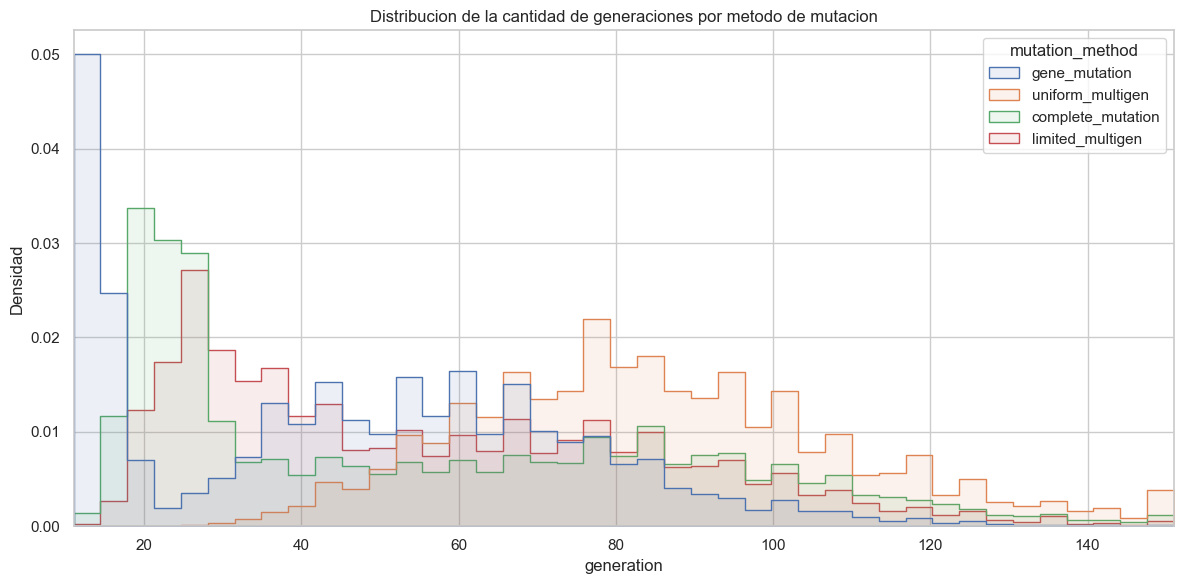

In [93]:
# No need to redefine data_df = df if data_df already contains the data

# Define the group and min-max for axes
group = ['uniform_multigen', 'limited_multigen','gene_mutation','complete_mutation']
performance_min = data_df['performance'].min()
performance_max = data_df['performance'].max()
generation_min = data_df['generation'].min()
generation_max = data_df['generation'].max()

# Initialize axes for the first plot
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Plot performance distribution
sns.histplot(data=data_df[data_df['mutation_method'].isin(group)], x="performance", hue="mutation_method", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes)
axes.set_title("Distribucion de la performance por metodo de mutacion")
axes.set_ylabel("Densidad")
axes.set_xlim([performance_min, performance_max])

plt.tight_layout()
plt.show()

# Initialize axes for the second plot
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Plot generation distribution
sns.histplot(data=data_df[data_df['mutation_method'].isin(group)], x="generation", hue="mutation_method", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes)
axes.set_title("Distribucion de la cantidad de generaciones por metodo de mutacion")
axes.set_ylabel("Densidad")
axes.set_xlim([generation_min, generation_max])

plt.tight_layout()
plt.show()


Se mantiene

Veamos ahora si existen variaciones de gene mutation que son mas performantes

In [80]:
df[df['mutation_method'] == 'gene_mutation'].groupby('gene')['performance'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
items,2240.0,34.486575,10.691667,17.695291,26.036787,31.930988,40.737682,60.448016
class,2240.0,28.359599,3.518924,18.510236,25.878323,28.288901,30.564956,39.864057
height,2240.0,26.989701,3.888066,18.277721,24.040989,27.039603,29.747883,40.302953


Mutar el Item presenta mucho mejores resultados, con una distribucion mas cercana a la observada en la mutacion uniforme

Aunque no alcanza para justificar respecto a la uniforme por performance

que hay de la cantidad de generaciones? (recurso de procesamiento)

In [81]:
df[df['mutation_method'] == 'gene_mutation'].groupby('gene')['generation'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
items,2240.0,54.919196,15.560861,19.0,43.0,54.0,66.0,128.0
class,2240.0,45.072768,32.022694,11.0,14.0,39.0,70.0,151.0
height,2240.0,42.508929,28.975770,11.0,15.0,38.5,66.0,151.0


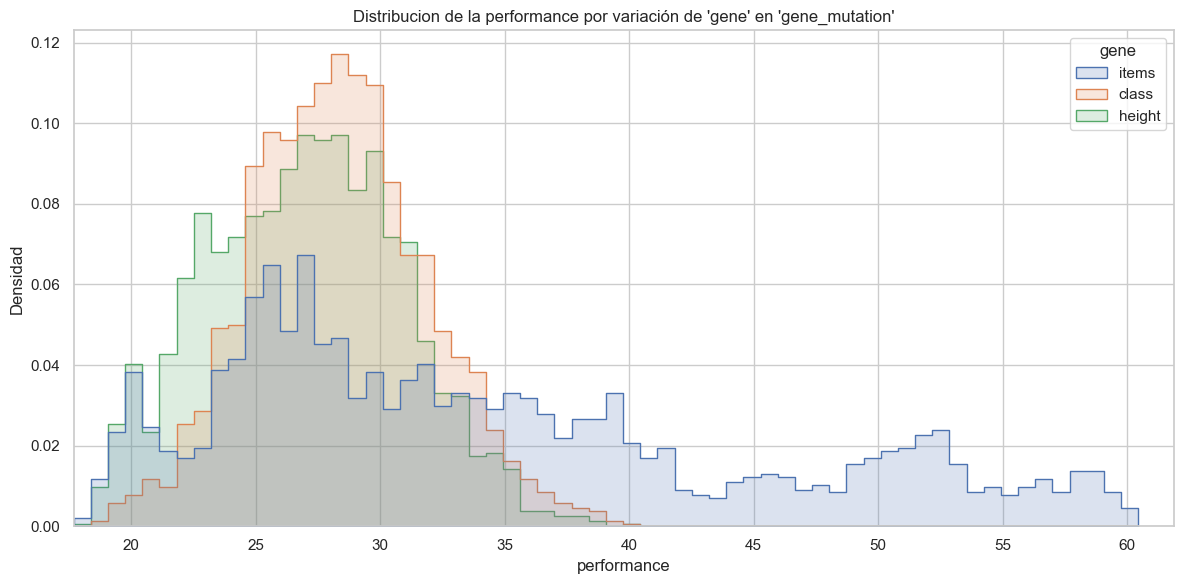

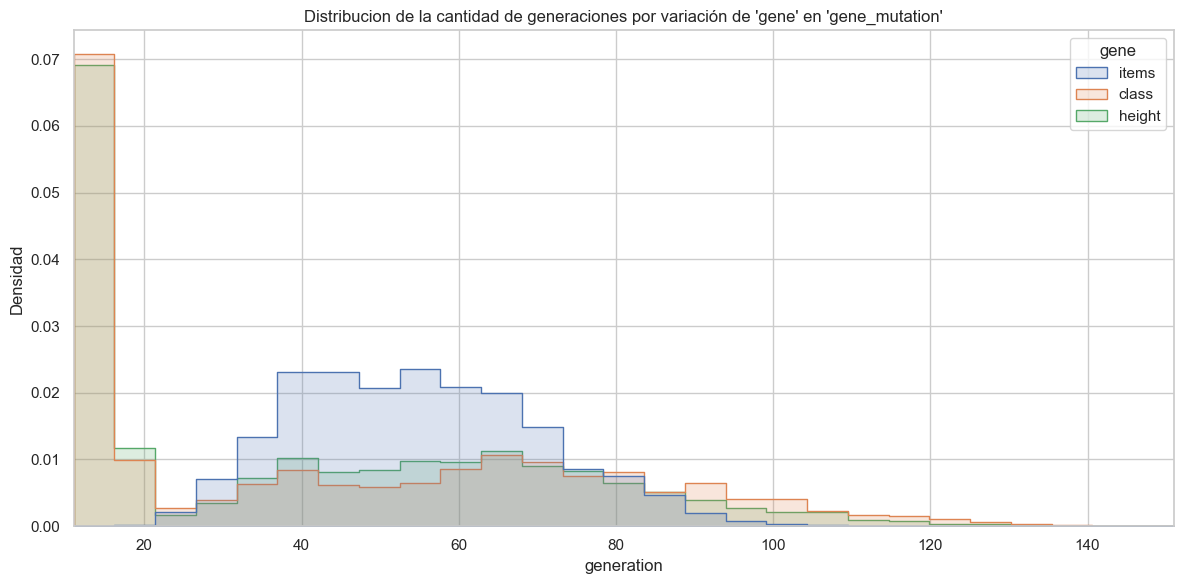

In [94]:
# Set the color palette to the one used before
filtered_data = data_df[data_df['mutation_method'] == 'gene_mutation']

# Plot performance distribution with the previous color palette
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data=filtered_data, x="performance", hue="gene", element="step", stat="density", common_norm=False, fill=True, alpha=0.2, ax=axes)
axes.set_title("Distribucion de la performance por variación de 'gene' en 'gene_mutation'")
axes.set_ylabel("Densidad")
axes.set_xlim([performance_min, performance_max])
plt.tight_layout()
plt.show()

# Plot generation distribution with the previous color palette
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data=filtered_data, x="generation", hue="gene", element="step", stat="density", common_norm=False, fill=True, alpha=0.2, ax=axes)
axes.set_title("Distribucion de la cantidad de generaciones por variación de 'gene' en 'gene_mutation'")
axes.set_ylabel("Densidad")
axes.set_xlim([generation_min, generation_max])
plt.tight_layout()
plt.show()


In [82]:
df[df['mutation_method'] == 'uniform_multigen'].groupby('gene')['generation'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
height,2240.0,85.166071,23.839910,24.0,68.0,82.0,100.0,151.0
items,2240.0,84.957589,23.606391,25.0,69.0,83.0,99.0,151.0
class,2240.0,84.885268,24.046493,27.0,67.0,83.0,101.0,151.0


Observando unicamente la mutacion de gen sobre el Item (la unica caracteristica con impacto sobre la performance) podemos observar la ventaja de mutar el gen

Mutar el gen resulta obtiene su resultado final en una notable menor cantidad de generaciones

Menor promedio, mediana y desviacion!

In [83]:
filteredDf.groupby('new_generation_method')['performance'].describe()

,count,mean,std,min,25%,50%,75%,max
new_generation_method,,,,,,,,
new_over_actual,9603.0,33.479418,9.231038,20.941068,27.462398,30.952132,35.235846,61.881124
use_all,9523.0,33.090398,7.879956,21.087134,28.002368,31.121593,34.818337,61.674428


In [84]:
df.groupby('new_generation_method')['performance'].describe()

,count,mean,std,min,25%,50%,75%,max
new_generation_method,,,,,,,,
new_over_actual,13440.0,32.523662,9.236804,18.412959,26.512170,30.060776,34.631594,61.881124
use_all,13440.0,32.049599,7.901923,17.695291,26.953497,30.229106,34.245246,61.674428


In [85]:
filteredDf.groupby('new_generation_method')['generation'].describe()

,count,mean,std,min,25%,50%,75%,max
new_generation_method,,,,,,,,
new_over_actual,9603.0,68.674581,33.718668,12.0,37.0,72.0,93.0,151.0
use_all,9523.0,59.061010,30.393888,11.0,31.0,60.0,81.0,151.0


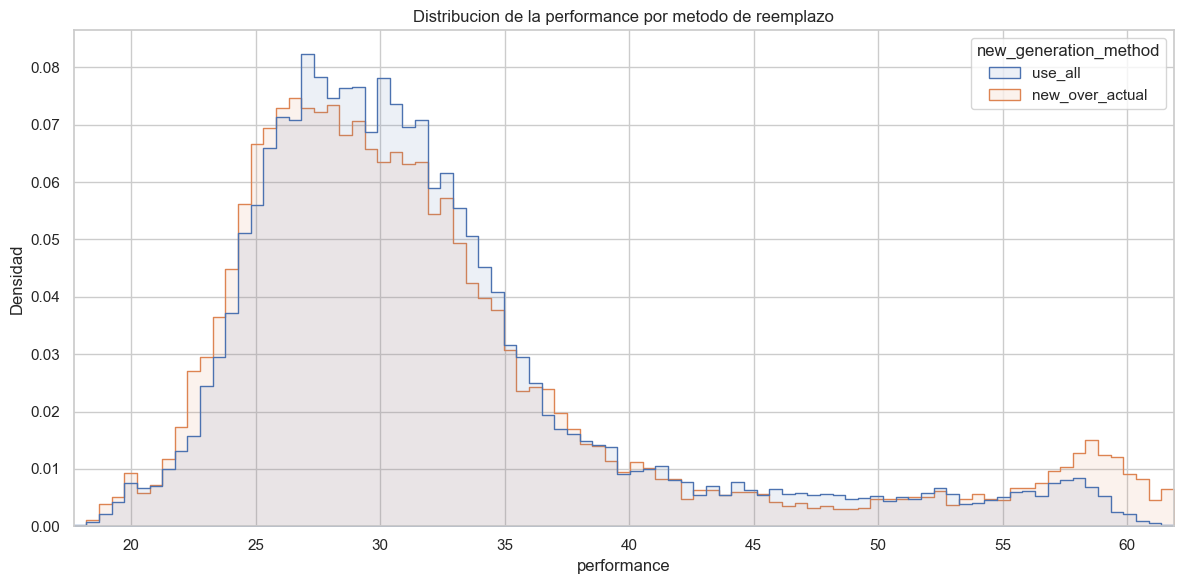

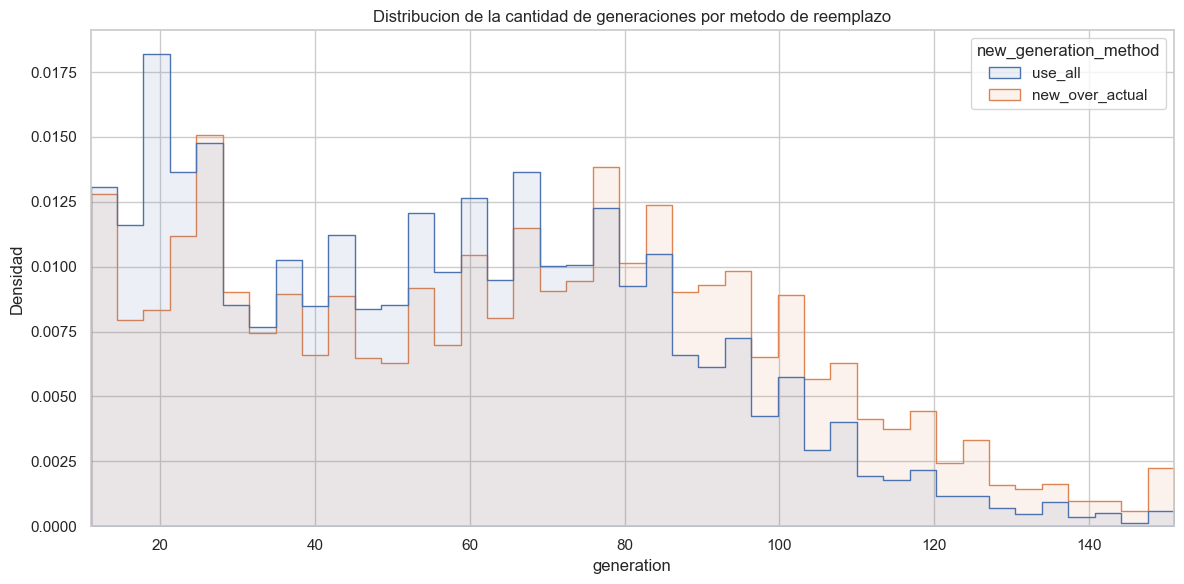

In [92]:
# No need to redefine data_df = df if data_df already contains the data

# Define the group and min-max for axes
group = ['use_all', 'new_over_actual']
performance_min = data_df['performance'].min()
performance_max = data_df['performance'].max()
generation_min = data_df['generation'].min()
generation_max = data_df['generation'].max()

# Initialize axes for the first plot
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Plot performance distribution
sns.histplot(data=data_df[data_df['new_generation_method'].isin(group)], x="performance", hue="new_generation_method", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes)
axes.set_title("Distribucion de la performance por metodo de reemplazo")
axes.set_ylabel("Densidad")
axes.set_xlim([performance_min, performance_max])

plt.tight_layout()
plt.show()

# Initialize axes for the second plot
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Plot generation distribution
sns.histplot(data=data_df[data_df['new_generation_method'].isin(group)], x="generation", hue="new_generation_method", element="step", stat="density", common_norm=False, fill=True, alpha=0.1, ax=axes)
axes.set_title("Distribucion de la cantidad de generaciones por metodo de reemplazo")
axes.set_ylabel("Densidad")
axes.set_xlim([generation_min, generation_max])

plt.tight_layout()
plt.show()


NEW GENERATION METHOD:

Mismos resultados de performance, o por lo menos indistinguibles con el analisis.

Menor uso de recursos por parte de use_all